# Self Potential (SP)

```{contents}
:local:
```

The purpose of this repository is to reconstruct paper from Y. Kim and N. Nakata (The Leading Edge, Volume 37, Issue 12, Dec 2018) about [Geophysical inversion versus machine learning in inverse problems](https://library.seg.org/doi/10.1190/tle37120894.1) and B. Russel (The Leading Edge, Volume 38, Issue 7, Jul 2019) about [Machine learning and geophysical inversion — A numerical study](https://library.seg.org/doi/10.1190/tle38070512.1).

Reference: Inversion of Self Potential Anomalies with Multilayer Perceptron Neural Networks [Ilknur Kaftan et. al, 2014, Pure Appl. Geophys](https://link.springer.com/article/10.1007/s00024-014-0778-y)
Syntethic data was created from sphere model (using [fwd_sp.py](https://github.com/ezygeo-ai/mlgi/blob/master/python/fwd_sp.py)) with parameters K = 94,686, h = 41.81 m, alpha = 309.37, dan x0 = 77.07 m. This result can be downloaded [here](https://github.com/ezygeo-ai/mlgi/blob/master/data/SP_syn_data.pickle) and seen below with noise distribution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

forward modeling function



In [2]:
# SP forward function
def SPfunc(x_inp, par):
    var_x0 = par[0]
    var_alpha = par[1]
    var_h = par[2]
    var_k = par[3]

    var_sp = []
    for i in x_inp:
        var_up = (i - var_x0) * np.cos(var_alpha) - var_h * np.sin(var_alpha)
        var_down = ((i - var_x0)*(i - var_x0) + var_h*var_h) ** (3/2)
        var = var_k * (var_up / var_down)
        var_sp.append(var)

    # === give noise for data (Gaussian Noise) 1
    std_noise = 10  # = %
    mean_noise = 0
    noise_data = np.random.normal(mean_noise, np.sqrt(std_noise), len(var_sp))
    var_sp_noise = var_sp + noise_data

    return var_sp, var_sp_noise, noise_data

In [3]:
# === TEST FORWARD MODELING
x0 = 77.07  # m
alpha = 309.37 * (np.pi/180)    # deg2rad
h = 41.81   # m
K = 94686


Calculating data


In [4]:
measure_loc = np.linspace(0, 150, 101)  # Location of measurement
print('number of data: ', len(measure_loc))
par_mod = [x0, alpha, h, K]      # model parameter of subsurface

get_SPData, get_SPData_noise, noise_from_maxData = SPfunc(measure_loc, par_mod)   # forward modeling test




number of data:  101


Plotting



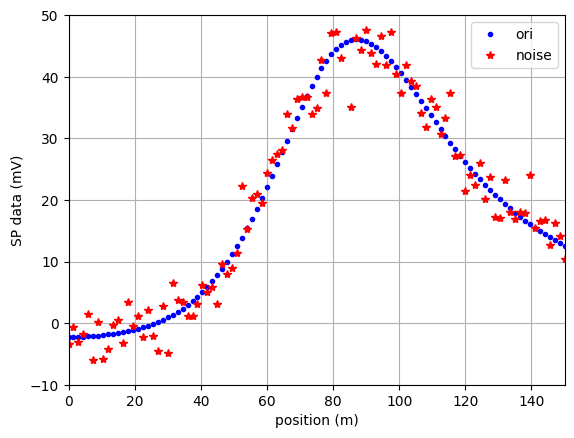

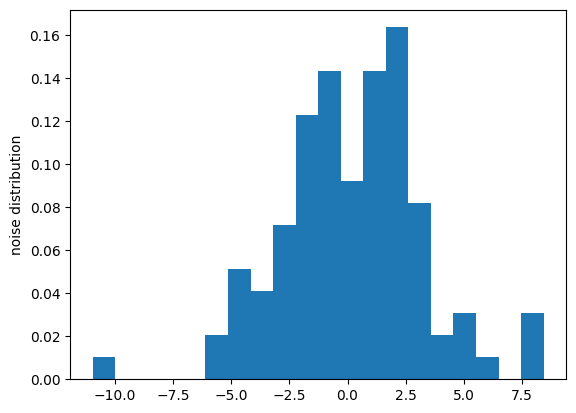

In [5]:
plt.figure()
plt.plot(measure_loc, get_SPData, 'b.')
plt.plot(measure_loc, get_SPData_noise, 'r*')
plt.xlim([0, 150])
plt.ylim([-10, 50])
plt.xlabel('position (m)')
plt.ylabel('SP data (mV)')
plt.legend(['ori', 'noise'])
plt.grid()

plt.figure()
plt.hist(noise_from_maxData, density=True, bins=20)
plt.ylabel('noise distribution')
plt.show()



Save output

In [6]:
with open('SP_syn_data.pickle', 'wb') as f:
    pickle.dump([measure_loc, get_SPData_noise], f)

